<a href="https://colab.research.google.com/github/akif2540/DiabetesProjectt/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#logistic regresyon

import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
diabets=pd.read_csv("diabetes.csv")
df= diabets.copy() # ana veriyi bozmamak için kopyaladık
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df['Outcome']=df['Outcome'].astype('category') # tipini category yaptık int ten değiştirdik

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


In [12]:
diabets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
diabets['Outcome'].mean()

0.3489583333333333

In [13]:
df['Outcome'].mean() # category yaptığımız için ortalamasını almadı

TypeError: ignored

In [14]:
df['Outcome'].value_counts() # verileri sayıyoruz

0    500
1    268
Name: Outcome, dtype: int64

<Axes: ylabel='Outcome'>

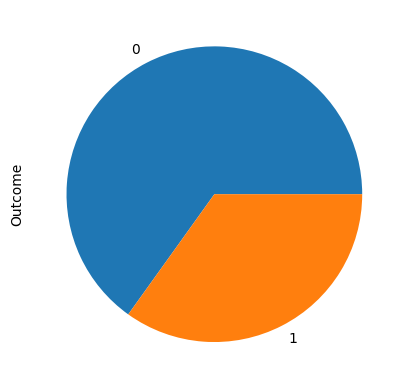

In [15]:
df['Outcome'].value_counts().plot.pie() # veri değerlerini görselleştirdik

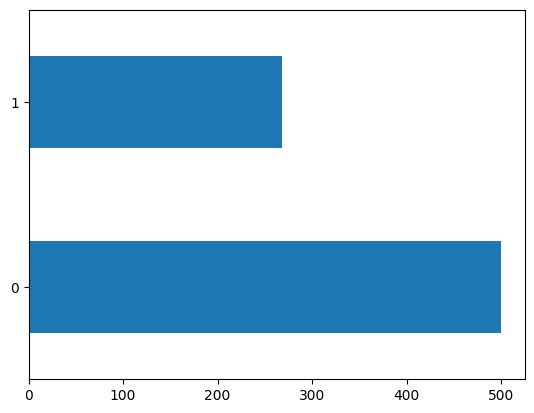

In [17]:
df['Outcome'].value_counts().plot.barh();

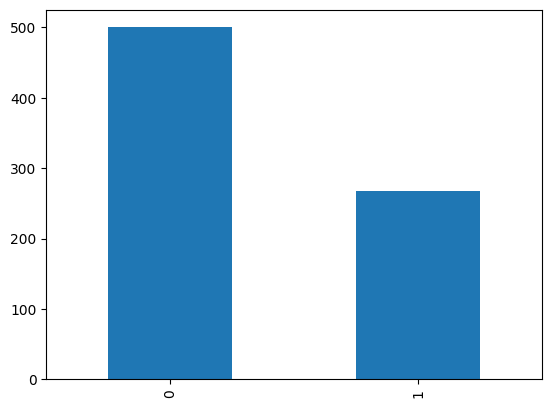

In [18]:
df['Outcome'].value_counts().plot.bar();

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


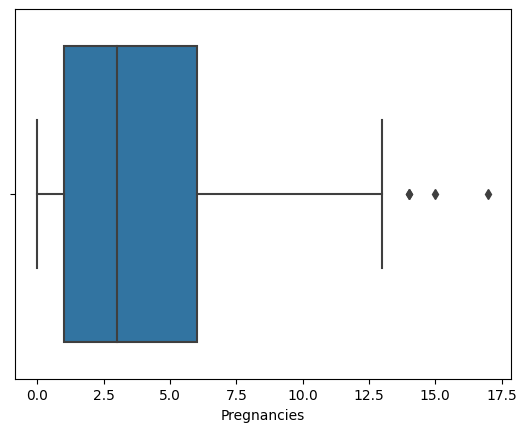

In [21]:
sns.boxplot(x="Pregnancies",data=df);

In [24]:
y=df['Outcome']
X=df.drop(['Outcome'],axis=1) # outcome ı ayırdık

In [25]:
 X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [26]:
y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: category
Categories (2, int64): [0, 1]

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [31]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [32]:
model.intercept_

array([-7.99974472])

In [33]:
model.coef_ # kat sayılar x lern etkisini belirleyen

array([[ 1.35710983e-01,  3.59194501e-02, -1.19279418e-02,
         3.02717675e-04, -1.33518549e-03,  8.42445854e-02,
         8.90253212e-01,  3.80294472e-03]])

In [35]:
X_test[:5] # son beş data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
682,0,95,64,39,105,44.6,0.366,22
566,1,99,72,30,18,38.6,0.412,21
357,13,129,0,30,0,39.9,0.569,44
323,13,152,90,33,29,26.8,0.731,43
34,10,122,78,31,0,27.6,0.512,45


In [36]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0])

In [38]:
y_pred[:5]

array([0, 0, 1, 1, 0])

In [52]:
from sklearn.metrics import confusion_matrix
df=pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted Positive','Predicted Negative'],
                index=['Actual Positive' ,'Actual Negative'])
df


,Predicted Positive,Predicted Negative
Actual Positive,88,12
Actual Negative,21,33


In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7857142857142857

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.81      0.88      0.84       100
           1       0.73      0.61      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154



In [55]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print(f"Accuracy:{accuracy_score(y_test,y_pred)}")
print(f"precision:{precision_score(y_test,y_pred)}")
print(f"recall:{recall_score(y_test,y_pred)}")
print(f"f1:{f1_score(y_test,y_pred)}")

Accuracy:0.7857142857142857
precision:0.7333333333333333
recall:0.6111111111111112
f1:0.6666666666666666


In [56]:
model.predict_proba(X_test)[:10]

array([[0.7879091 , 0.2120909 ],
       [0.81506819, 0.18493181],
       [0.0799938 , 0.9200062 ],
       [0.23253259, 0.76746741],
       [0.55709105, 0.44290895],
       [0.53324163, 0.46675837],
       [0.97696714, 0.02303286],
       [0.89305707, 0.10694293],
       [0.03808054, 0.96191946],
       [0.62865485, 0.37134515]])

In [57]:
y_test[:10]

682    0
566    0
357    1
323    1
34     0
577    1
461    0
554    0
154    1
439    0
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]

In [59]:
y_probability=model.predict_proba(X_test)
y_probability=y_probability[:,1]
y_probability[0:10]

array([0.2120909 , 0.18493181, 0.9200062 , 0.76746741, 0.44290895,
       0.46675837, 0.02303286, 0.10694293, 0.96191946, 0.37134515])

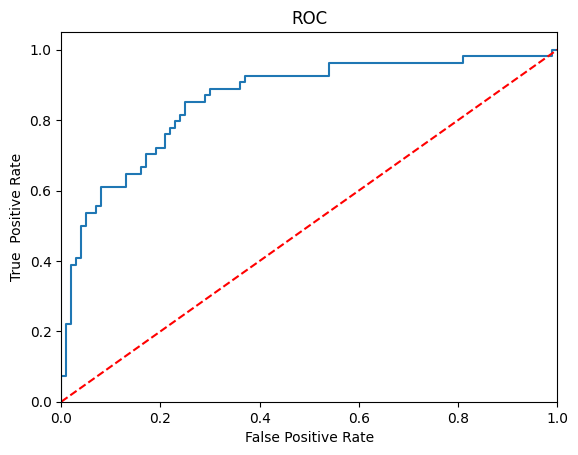

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_auc_score, roc_curve
model_roc_auc=roc_auc_score(y_test,model.predict(X_test))

fpr,tpr,threshold=roc_curve(y_test,model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC(area=%0.2f)" %model_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim(([0.0,1.0]))
plt.ylim(([0.0,1.05]))
plt.xlabel('False Positive Rate')
plt.ylabel('True  Positive Rate')
plt.title('ROC')
plt.show();

